Dataset Preview:
   Feature1  Feature2  Target
0       5.1       3.5       1
1       4.9       3.0       1
2       4.7       3.2       1
3       4.6       3.1       1
4       5.0       3.6       1

Accuracy for different K values:
K = 1, Accuracy = 1.0000
K = 3, Accuracy = 1.0000
K = 5, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 9, Accuracy = 1.0000

Best K: 1

Confusion Matrix:
[[26  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



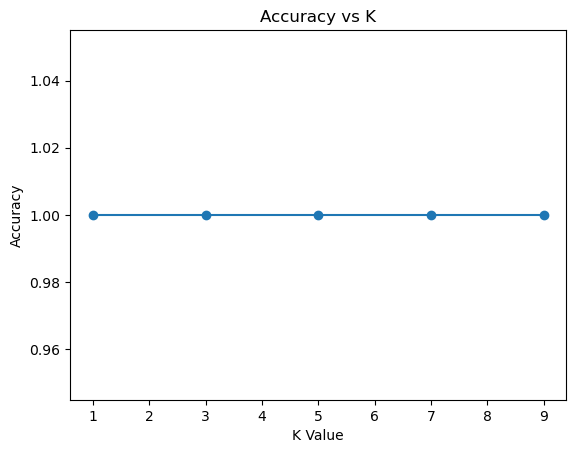

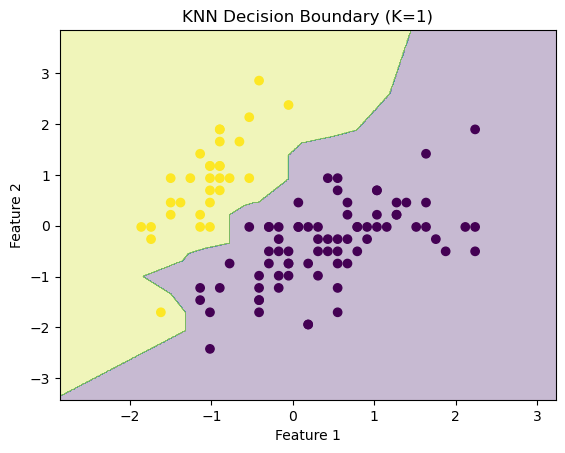

In [1]:
# ==========================================================
# Task 6: K-Nearest Neighbors (KNN) Classification
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================================
# 1. Load Dataset
# ==========================================================

iris = load_iris()

# Use only first two features for visualization
X = iris.data[:, :2]
y = iris.target

# Convert to binary classification (class 0 vs others)
y = (y == 0).astype(int)

# Create DataFrame (optional)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

print("Dataset Preview:")
print(df.head())

# ==========================================================
# 2. Train-Test Split
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ==========================================================
# 3. Feature Scaling (Important for KNN)
# ==========================================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================================================
# 4. Train KNN with Different K Values
# ==========================================================

k_values = [1, 3, 5, 7, 9]
accuracies = []

print("\nAccuracy for different K values:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")

# ==========================================================
# 5. Select Best K
# ==========================================================

best_k = k_values[np.argmax(accuracies)]
print("\nBest K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# ==========================================================
# 6. Evaluation
# ==========================================================

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================================================
# 7. Plot Accuracy vs K
# ==========================================================

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

# ==========================================================
# 8. Decision Boundary Visualization
# ==========================================================

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"KNN Decision Boundary (K={best_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(knn, X_train, y_train)

